### ***Question 1*** - **KNN algorithm using Python ‘scikit-learn’ package**


 **Import Dataset**

In [551]:
import pandas as pd
mob_dataset = pd.read_csv('Mobile_Dataset.csv')
mob_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [552]:
mob_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [553]:
mob_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Handling of missing values & null values** 

In [554]:
# check missing values in variables

mob_dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [555]:
# check `na` values in the dataset

mob_dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Finding outliers** 

In [556]:
print(round(mob_dataset.describe(),2))

       battery_power    blue  clock_speed  dual_sim       fc   four_g  \
count        2000.00  2000.0      2000.00   2000.00  2000.00  2000.00   
mean         1238.52     0.5         1.52      0.51     4.31     0.52   
std           439.42     0.5         0.82      0.50     4.34     0.50   
min           501.00     0.0         0.50      0.00     0.00     0.00   
25%           851.75     0.0         0.70      0.00     1.00     0.00   
50%          1226.00     0.0         1.50      1.00     3.00     1.00   
75%          1615.25     1.0         2.20      1.00     7.00     1.00   
max          1998.00     1.0         3.00      1.00    19.00     1.00   

       int_memory    m_dep  mobile_wt  n_cores  ...  px_height  px_width  \
count     2000.00  2000.00    2000.00  2000.00  ...    2000.00   2000.00   
mean        32.05     0.50     140.25     4.52  ...     645.11   1251.52   
std         18.15     0.29      35.40     2.29  ...     443.78    432.20   
min          2.00     0.10      80.00 

According to the above output no outliers in the dataset.

**Rearranging dataset** 



In [557]:
X = mob_dataset.drop(columns=['price_range'])
y= mob_dataset['price_range']


**Normalizing data**

In [558]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = mob_dataset.columns
d = scaler.fit_transform(mob_dataset)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333


**Splitting dataset for training & testing**

In [559]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0) # allocation 20% of data for testing
print ("X_train shape = ", X_train.shape, "y_train shape = ", y_train.shape)
print ("X_test shape = ", X_test.shape, "y_test shape = ", y_test.shape)


X_train shape =  (1600, 20) y_train shape =  (1600,)
X_test shape =  (400, 20) y_test shape =  (400,)


**Feature Extraction**

In [560]:
# check data types in X_train

X_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [561]:
# check data types in X_test

X_test.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [562]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [563]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

**KNN classification**

In [564]:
from sklearn.neighbors import KNeighborsClassifier

#import  metrics models to check the accuracy
from sklearn import metrics
#Try running from k=1 to 25 and record testing accuracy
k_range =range(1,26)
scores={}
scores_list =[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit (X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k]= metrics.accuracy_score (y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))


**Plot the relationship between the values of K**

Text(0, 0.5, 'Testing Accuracy')

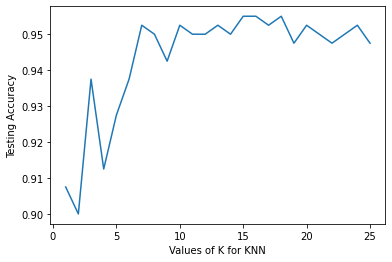

In [565]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Values of K for KNN')
plt.ylabel('Testing Accuracy')

In [566]:
scores

{1: 0.9075,
 2: 0.9,
 3: 0.9375,
 4: 0.9125,
 5: 0.9275,
 6: 0.9375,
 7: 0.9525,
 8: 0.95,
 9: 0.9425,
 10: 0.9525,
 11: 0.95,
 12: 0.95,
 13: 0.9525,
 14: 0.95,
 15: 0.955,
 16: 0.955,
 17: 0.9525,
 18: 0.955,
 19: 0.9475,
 20: 0.9525,
 21: 0.95,
 22: 0.9475,
 23: 0.95,
 24: 0.9525,
 25: 0.9475}

**Fitting K value to 7**

In [567]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicted values**

In [568]:
y_pred =knn.predict(X_test)
y_pred


array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

**Evaluating the KNN classifier**

In [569]:
acc =  knn.score(X_test, y_test)
print(acc)

0.9525


In [570]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9525


In [571]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 95   0   0   0]
 [  3  87   2   0]
 [  0   5  89   5]
 [  0   0   4 110]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       0.95      0.95      0.95        92
           2       0.94      0.90      0.92        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



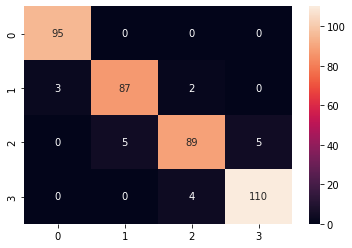

In [572]:
from sklearn.metrics import classification_report
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['0','1','2', '3']
cm = pd.DataFrame(cf_matrix,columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

The results show that KNN was able to classify all the 400 records in the test set with 95% accuracy, which is above average. The supports are fairly equal (even distribution of classes in the dataset), so the weighted F1 and unweighted F1 are going to be roughly the same.

We can also see the result of the metrics for each of the 4 classes. From that, we are able to notice that *price range 2* had the lowest precision, lowest recall, and lowest f1-score.We have *price range 0* with the best scores.

By looking at the confusion matrix, we can see that:

*price range 0* was correctly classified as *price range 0* in all 95 cases.

*price range 1* was correctly classified only in 87 cases out of 92 cases.

*price range 2* was correctly classified in 89 cases out of 99 cases.

*price range 3* was correctly classified in 110 cases out of 114 cases.

Also, notice that the diagonal displays the true positive values, when looking at it, it is plain to see that *price range 1* and *price range 2*  have the least correctly predicted values whilst *price range 3* have highest correctly predicted values.

**Finding the Best K for KNN Classification**

In [573]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

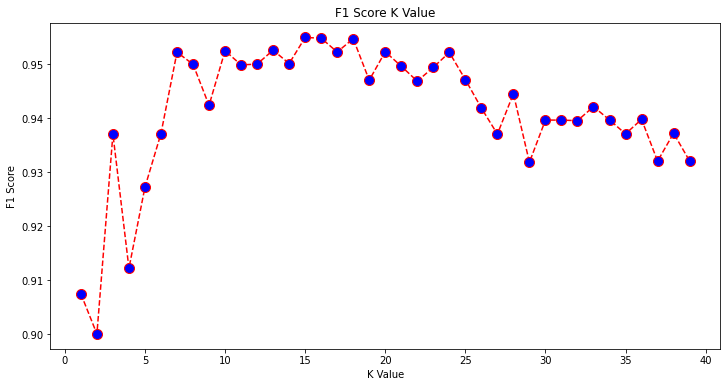

In [574]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

From the output, we can see that the f1-score is the highest when the value of the K is 15. Let's retrain our classifier with 15 neighbors and see what it does to our classification report results.

In [575]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.95      0.97      0.96        92
           2       0.94      0.92      0.93        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.95      0.95      0.95       400



Our metrics have improved with 15 neighbors, we have 95% accuracy and higher precision, recall, and f1-scores.
And this will overcome overfitting problem too by not keeping K value too smaller.

### ***Question 2*** - **Multi-layer neural network using Keras**


In [576]:
from tensorflow import keras
#Dependencies
import numpy as np
import pandas as pd

In [577]:
#Changing pandas dataframe to numpy array
X = mob_dataset.iloc[:,:20].values
y = mob_dataset.iloc[:,20:21].values

**Normalizing**

In [578]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

**One hot encode the classes**

In [579]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

**Split dataset into training and testing**

In [580]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

**Building Neural Network**

In [581]:
from keras.models import Sequential
from keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 16)                336       
                                                                 
 dense_27 (Dense)            (None, 4)                 68        
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**


In [582]:
from keras import optimizers
OPTIMIZER= optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

**Fitting the model**

In [583]:
BATCH_SIZE = 128
EPOCHES = 200
VERBOSE = 1
VALIDATION_SPLIT = 0.2
model_history = model.fit(x=X_train, y=y_train, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
10/10 [==============================] - 1s 24ms/step - loss: 1.6198 - accuracy: 0.2375 - val_loss: 1.4577 - val_accuracy: 0.2844
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 1.3764 - accuracy: 0.3219 - val_loss: 1.3144 - val_accuracy: 0.3531
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 1.2505 - accuracy: 0.3969 - val_loss: 1.2133 - val_accuracy: 0.4062
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 1.1523 - accuracy: 0.4477 - val_loss: 1.1234 - val_accuracy: 0.4656
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 1.0651 - accuracy: 0.5094 - val_loss: 1.0395 - val_accuracy: 0.5219
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9868 - accuracy: 0.5758 - val_loss: 0.9663 - val_accuracy: 0.5875
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9161 - accuracy: 0.6094 - val_loss: 0.9003 - val_accuracy: 0.6344
Epoch 8/200


**Evaluating the model**

In [584]:
score = model.evaluate(X_test, y_test, verbose=2) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

13/13 - 0s - loss: 0.1539 - accuracy: 0.9325 - 31ms/epoch - 2ms/step
Test score: 0.15390847623348236
Test accuracy: 0.9325000047683716


**Predicting the class**

In [585]:
y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[10], "Predicted class = ", y_classes[10])

13/13 [==============================] - 0s 2ms/step
True class =  [0. 1. 0. 0.] Predicted class =  1


**Plotting the model perfomance**

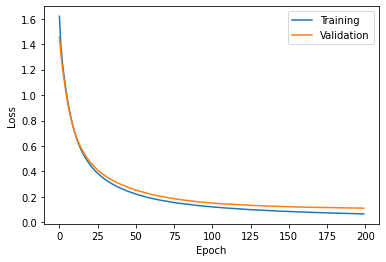

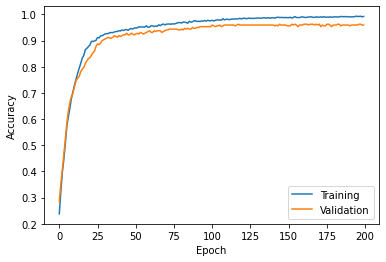

In [586]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_history)

**Saving the trained model and its weights**

In [587]:
json_string = model.to_json() # as json 
open('mlp_dataset_model.json', 'w').write(json_string)
# save the weights in h5 format 
model.save_weights('mlp_dataset_wts.h5')

**Retrieving a trained model & its weights**

In [588]:
from keras.models import model_from_json
model1 = model_from_json(open('mlp_dataset_model.json').read())
model1.load_weights('mlp_dataset_wts.h5')
model1.summary()
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
score = model1.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 16)                336       
                                                                 
 dense_27 (Dense)            (None, 4)                 68        
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________
Test score: 0.15390847623348236
Test accuracy: 0.9325000047683716
13/13 [==============================] - 0s 2ms/step
True class =  [0. 0. 0. 1.] Predicted class =  3


# **Comparing KNN Classification Algorithm & Multi-layer neural network**

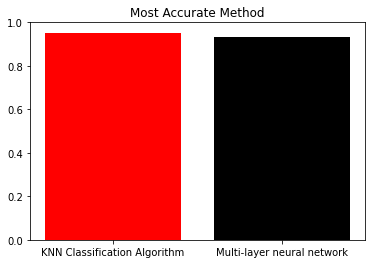

In [589]:
models = ['KNN Classification Algorithm' , 'Multi-layer neural network']
acc_scores = [acc, score[1] ]
plt.bar(models, acc_scores, color=['red', 'black'])

plt.title("Most Accurate Method")
plt.show()